# Lecture 12 - Reliability Theory

## L12.1 Systems and components

Reliability theory revolves around a system of several components and the probability that the system functions and fails. The components are arranged in some graph, e.g., 4 serial components:

----x-----x-----x-----x----

You can think of, e.g., a plant manifacturing a product with 4 machines. The components are assumed to be independent. In the case of serial graph, the failure of one component results in the failure of the entire system.

One can also imagine a parallel graph, which introduced redundancy. If one component fails in that system, then some other component will pick it up. The only way for the system to fail is if all components fail.

We will look into different structures and how they depend on the arrangements of the graphs, and then look into the probabilities of failures. These probabilities can be challenging to calculate explicitly, but relatively straight forward to simulate (just flip a few coints).

## L12.2 Structure functions

We will work with systems of $n$ components where each component is either functioning or has failed. The indicator $x_i$ is 1 if the $i$th component is functioning and 0 if it has failed. The system is then characterized by the state vector $x = (x_1, x_2, ..., x_n)$, indicating which components are functioning and which have failed. We then define the *structure function* of the system, $\phi(x)$ which is 1 if the system is functioning but 0 if the system has failed.

In the case of the serial structure, the structure function can be written as

$$\phi(x) = min(x_1, x_2, ..., x_n) = \prod_{i=1}^n{x_i}$$

The parallel system has structure function

$$\phi(x) = max(x_1, x_2, ..., x_n) = 1 - \prod_{i=1}^n{(1-x_i)}$$

It's good to take a look at what this means for two components and convince oneself that the two are the same.

$$\phi(x) = 1 - (1-x_1)(1-x_2)$$

This is sometimes written as

$$\phi(x) = 1 - (1-x_1)(1-x_2) = x_1 \amalg x_2$$

and in general, for $n$ components, 

$$\phi(x) =  x_1 \amalg x_2 \amalg x_3 \amalg ... \amalg x_n = \amalg_{i=1}^n{x_i}$$

The up-side-down $\pi$ ($\amalg$) can be used whenever we have parallel element in the structure.

Another system type is called $k$ out of $n$, where the system works if, and only if, $k$ components out of the $n$ are functioning (just any $k$ components need to be functioning, and then the system is working). This can be drawn up  where each combinations of $k$ components are drawn as a series, and then all series drawn in parallel (e.g. 2 out of 3).

The structure function in this case is 1 if $\sum_{i=1}^n{x_i} \ge k$ and 0 if the sum is less than $k$.

We can also express the structure function as follows:

$$\phi(x) = x_1x_2 \amalg x_1x_3 \amalg x_2x_3 = 1 - (1-x_1x_2)(1-x_1x_3)(1-x_2x_3).$$

Another example is when we have components 1 and 2 in series, and then, following 2, we get a parallel component of 3 and 4. The system will thus fail if 1 *or* 2 fails, or if 3 *and* 4 fails. The structure function in this case is

$$\phi(x) = x_1x_2\max(x_3,x_4)$$

or

$$\phi(x) = x_1x_2(x_3 \amalg x4) = x_1x_2(1-(1-x_3)(1-x_4)) = x_1x_2(x_3 + x_4 - x_3x_4)$$

a system can also have irrelevant components, e.g., if we have a parallel structure with component 1 on the top and components 1 and 2 in the bottom. In this case, component 2 is irrelevant since in either case, component 1 needs to be functioning. The structure function is just $\phi(x) = x_1$, which can also be derived directly using our the method for constructing structure functions.

## L12.3 Reliability of a system

We assume that each component $i$ behaves like a Bernoulli random variable with probability $p_i$ of functioning and probability $1-p_i$ of failing, and that all components are independent.

The *reliability* of a system is simply the probability that the whole system is up and running, i.e.,

$$r = P(\phi(x) = 1)$$

where, as before, $x = (x_1, x_2, ..., x_n)$. Using our assumption that all components are independent Bernoullies, we see that the reliability is just a function of $p = (p_1, p_2, ..., p_n)$, $r = r(p)$.

Let's take a look at couple of systems.

The serial system has the following reliability function
$$r(p) = P(\phi(x) = 1) = P\left( \prod_{i=1}^n{X_i} = 1 \right) = \prod_{i=1}^n{p_i}$$

The parallel system has the following reliability function
$$r(p) = P(\phi(x) = 1) = P(X_i = 1 \text{ for some } i=1, ..n) = 1 - P(X_i = 0 \text{ for all } i=1, ..n) = 1 - \prod_{i=1}^n{(1-p_i)} = \amalg_{i=1}^n{p_i}$$

The $k$ out of $n$ system has the following reliability function

$$r(p) = P(\phi(x) = 1) = P\left( \sum_{i=1}^n{X_i} \ge k \right) = \sum_{i=k}^n{{n \brack i}p^i(1-p)^{n-i}}$$

It is sometimes to useful to use the following. The $\phi(x)$ only takes on the values of 0 and 1, so 

$$E[\phi(x)] = 1*P(\phi(x)=1) + 0*P(\phi(x)=0) = r(p)$$

For example, the 4 component system we had before is $$\phi(x) = x_1x_2\max(x_3,x_4)$$ and thus

$$r(p) = E[\phi(x)] = E[X_1X_2\max(X_3,X_4)] = E[X_1X_2(1-(1-X_3)(1-X_4))] = p_1p_2(1-(1-p_3)(1-p_4))$$

This demostrates that we may need to use tricks in order to estimate the reliability function.

In [1]:
import numpy as np

p1 = 0.7
p2 = 0.8
p3 = 0.7
p4 = 0.6

N = 10000

def phi(x1,x2,x3,x4):
    return x1*x2*max(x3,x4)

ones = 0
for i in range(N):
    x1 = np.random.choice([0,1], p=[1-p1,p1])
    x2 = np.random.choice([0,1], p=[1-p2,p2])
    x3 = np.random.choice([0,1], p=[1-p3,p3])
    x4 = np.random.choice([0,1], p=[1-p4,p4])
    if phi(x1,x2,x3,x4) == 1:
        ones += 1

print("Simulated distribution:")
print("Probability of functioning: ",ones/N) 
print("Probability of failing: ",1 - ones/N) 
print()
print("Theoretical distribution:")
p = p1*p2*(1 - (1-p3)*(1-p4))
print("Probability of functioning: ",p) 
print("Probability of failing: ",1 - p) 

Simulated distribution:
Probability of functioning:  0.496
Probability of failing:  0.504

Theoretical distribution:
Probability of functioning:  0.49279999999999996
Probability of failing:  0.5072000000000001


## L12.4 System and life and expected system life

We now add some considerations for time, i.e., how long will the system be functioning before a critical component fails, causing the failure of the whole system. The first question we want to answer is how to express the distribution of the system lifetime in terms of the system reliability function, $r(p)$. Before we go there, we need to define some terminology.

In this context is it convenient to define $\bar{F}(t) = 1 - F(t)$ so that if $F(t) = P(T \le t)$ is a cumulative distribution function of a random variable $T$, then $\bar{F}(t) = P(T > t)$. In this context, we are interested in 

$$\bar{F}(t) = P(\text{system life} > t) = P(\text{system is functioning at time t})$$

Let's define the random variables $T_i$ as the lifetimes of components $i=1, ..,n $, meaning their time of failure, and $\bar{F}_i(t) =P(T_i>t)$. Similarly, we let $T$ without a subscript, be the lifetime of the system as a whole.

By definition, the reliability of a system, $r(p)$, is the probability that the system is functioning. Thus, 

$$P(\text{system is functioning at time t}) = \bar{F}(t) = r(\bar{F}_1(t), ..., \bar{F}_n(t)).$$

Let's look at an example of a serial system. 

In this case, $r(p) = \prod_{i=1}^n{p_i}$, and so

$$\bar{F}(t) = r(\bar{F}_1(t), ..., \bar{F}_n(t)) = \prod_{i=1}^n{\bar{F}_i(t)}$$

Let's explore this in a little more detail. We defined $X_i$ as the indicator of component $i$. If $X_i = 1$, the component is functioning, and 0 if the component has failed. Now, the $X_i$ is a function of time $X_i(t)$, indicating the status of the component at time $t$. The status is 1 if $T>t$, i.e., the component has not failed, and 0 if $T \le t$. The probability that the system is functioning at time $t$ is thus 

$$r(p(t)) = \prod_{i=1}^n{p_i(t)} = \prod_{i=1}^n{P(T_i>t)} = \prod_{i=1}^n{\bar{F}_i(t)}.$$

Similarly, for a parallel system,

$$r(p(t)) = 1 -  \prod_{i=1}^n{(1 - p_i(t))} = 1 -  \prod_{i=1}^n{F_i(t)}$$

Notice that there is no bar on the F in this last expression.

We have thus far not said anything about the distribution of the lifetimes of the components, but this is a key consideration when looking into the lifetime of the system.

Let's take a look a few examples.

The simplest assumption is to assume an exponential failure time of each component, i.e., 

$$F_i(t) = 1 - e^{-\lambda_i t}$$

for some positive constants $\lambda_i$. This means that 

$$\bar{F}_i(t) = e^{-\lambda_i t}$$

and we have a tractable analytic distribution for, e.g., serial system:

$$r(p(t)) =\prod_{i=1}^n{\bar{F}_i(t)} = e^{-t \sum_{i=0}^n{\lambda_i}}$$

i.e., the lifetime of the system itself is also exponentially distributed.

This is not the case for a parallel system, but here we have

$$r(p(t)) =1 -  \prod_{i=1}^n{F_i(t)} = 1 -  \prod_{i=1}^n{(1 -  e^{-\lambda_i t})}$$

which is less tractable from an analytic point of view (a mixture density).

We can introduce the failure rate function, or failure intensity at time $t$ as

$$\lambda(t) = \frac{f(t)}{\bar{F}(t)}$$

where $f$ is the pdf of the failure time $T$ and $F$ is the cdf of $T$. This is the probability intensity that a $t$ year system will fail. If this is an increasing function of time, then the probability of failure will increase in time (e.g., machines may wear out as time increases), while a decreasing function of time means that the probability of failure is higher in the early times. 

For an exponential distribution, $\lambda$ is just constant since $f(t) = \lambda e^{-\lambda t}$.

There are couple of other common interarrival time distributions that are used in practice, and let's take a look at those.

First is the Weibull distribution:

$$F(t) = 1 - e^{-(\lambda t)^{\alpha}}$$

where $\lambda > 0$ and $\alpha > 0$.

Let's look a plot of the Weibull pdf.

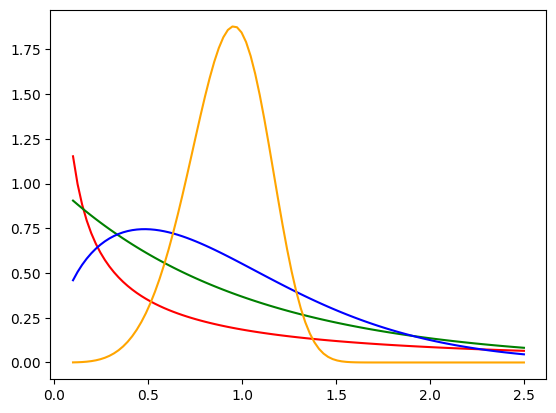

In [2]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

x= np.linspace(0.1,2.5, 100)

lambda_ = 1
alpha = [0.5, 1, 1.5, 5]
colors = ["red","green","blue","orange"]
for c,a in zip(colors,alpha):
    pdf = a*lambda_*(x*lambda_)**(a-1)*np.exp(-(x*lambda_)**a)
    plt.plot(x,pdf,color=c)

The failure rate of a Weibull distribution is

$$ \lambda(t) = \frac{e^{-(\lambda t)^{\alpha}}\alpha \lambda (\lambda t)^{\alpha-1}}{e^{-(\lambda t)^{\alpha}}} = \alpha \lambda (\lambda t)^{\alpha-1}$$ 

which is an increasing function of time, meaning that the failure rate is increasing, if $\alpha > 1$, i.e., it is more likely that the system will fail as time goes on, but decreasing if $\alpha < 1$.

Another common distribution for the failure times is the gamma distribution, but's its distribution is a bit more complicated. It too can show both increasing and decreasing failure rate, depending on the choice of parameters.

Let's move on the expected life time of a system. The expected lifetime of a system can be determined from the reliability function, but the simplest way to find the expected lifetime is to perform a Monte Carlo simulation. This way, we can explore complicted systems with complicated lifetime distributions, and even dependency between components, and not only the expected lifetime but the distribution of the lifetime (e.g., we may want to ensure that there is at least 95% probability that the system is functioning after some specific time). Analytical approaches only work for very simple systems with simple lifetime distributions.

In order to calculate the expected lifetime, we can use the following general formula (applies in all situations) for the expectation of a non-negative random variable $X$:

$$E[X] = \int_0^{\infty}{P(X > x) dx}$$

To see that this is the case, we can use that $P(X > x) = 1 - F(x)$, $dF/dx = f$, and the following trick:

$$\int_0^{\infty}{P(X > x) dx} = \int_0^{\infty}{(1 - F(x)) dx} = \int_0^{\infty}{1 -  \left(\int_0^{x} {f(y)dy}\right) dx} =  \int_0^{\infty}{\int_x^{\infty} {f(y)dy} dx} = \int_0^{\infty}{\int_0^{y} {f(y)dx} dy} = \int_0^{\infty}{yf(y)dy} = E[X]$$

where we switched the order of the integration (in the next to last equality on the upper line, we can imagine fixing an x, and the y then goes from from x to $\infty$, but in the last equality, we fix y and let x go from 0 to y - this coves the same region).

Since $r(p) = P(X>x)$, we have a formula for the expected lifetime of a system:

$$E[T] = \int_0^{\infty}{r(F_i(t)) dt}.$$

Let's consider a simple situation of a serial system with exponential lifetimes. Suppose we have 10 components, each with a parameter $\lambda_i = 1$, i.e., the expected lifetime of each component is 1. The system will fail if one of these components fails, so what is the expected lifetime of the system?


$$E[T] = \int_0^{\infty}{r(F_i(t)) dt} = \int_0^{\infty}{e^{-10t}dt} = 1/10$$

Let's do this one using Monte Carlo simulations as well.

In [3]:
#Simulate the lifetime of a serial system

import numpy as np

N = 10000
lambda_ = 1 #Of each component

lifetimes = [] #samples of lifetimes for the system
for i in range(N):
    components = np.random.exponential(scale=1/lambda_, size=10) #10 lifetimes, one for each component
    system_lifetime = min(components) #First to fail will fail the system
    lifetimes.append(system_lifetime)

print("Average lifetime: ", sum(lifetimes)/N)

Average lifetime:  0.09994800386934485


Let's consider one more example, the four component system we had before (two in serial and then two in parallel). If we assume that the lifetime of the components are uniformly distributed in (0,i) for i = 1, 2, 3, 4. A very simple structure. With some algebra, one can show that the expected lifetime of the system is approximately 0.41. Let's do this one with a naive Monte Carlo (not using the structure function, which can also be done).

In [4]:
N = 10000

lifetimes = [] #samples of lifetimes for the system
for i in range(N):
    #The lifetime of the components
    t1 = np.random.uniform(0,1)
    t2 = np.random.uniform(0,2)
    t3 = np.random.uniform(0,3)
    t4 = np.random.uniform(0,4)
    #First, check the failure time of the parallel structure:
    t34 = max(t3,t4)
    #Then, the remaining serial structure (parallel converted to serial)
    lifetimes.append(min(t1,t2,t34))
    

print("Average lifetime: ", sum(lifetimes)/N)

Average lifetime:  0.41189857121770074


Hopefully this will convince you that using Monte Carlo is much, much simpler and can handle more powerful distributions than performing algebraic manipulations.

We can also consider other more complicated situations, such as a situation where a component can be repaired. In this case, we end up with a Markov chain for the system -  a continuous time Markow chain, with two states, either functioning or failing.

## Homework

1. Write the structure function for the following system: First we have a parallel structure with two branhes. Component 1 is on the top branch, but the lower branch has two components in serial - components 2 and 3. Then, after the parallel structure, we have a single component, 4 linked to the parallel structure in serial way.

2. Consider a system with two components, each with an exponential lifetime. Find the expected lifetime if
a) The system is serial
b) The system is parallel

Feel free to use Monte Carlo in 2.

In [136]:
#Simulate the lifetime of a serial system

import numpy as np

N = 10000
lambda1 = 1 #Of each component
lambda2 = 1 #Of each component
lifetimes = [] #samples of lifetimes for the system
for i in range(N):    
    comp1 = np.random.exponential(scale=1/lambda1, size = 1)
    comp2 = np.random.exponential(scale=1/lambda2, size = 1)
    system_lifetime = min(comp1, comp2) #First to fail will fail the system
    lifetimes.append(system_lifetime)

print("Average lifetime: ", sum(lifetimes)/N)

Average lifetime:  [0.49615154]


In [143]:
#Simulate the lifetime of a parallel system

import numpy as np

N = 100000
lambda1 = 1 #Of each component
lambda2 = 5 #Of each component
lifetimes = [] #samples of lifetimes for the system
for i in range(N):    
    comp1 = np.random.exponential(scale=1/lambda1, size = 1)
    comp2 = np.random.exponential(scale=1/lambda2, size = 1)
    system_lifetime = max(comp1, comp2) #last system to fail will fail the total system
    lifetimes.append(system_lifetime)

print("Average lifetime: ", sum(lifetimes)/N)

Average lifetime:  [1.03025357]
